## Proyecto Final

**Estudiante: Richard Douglas Grijalba**

**Curso: Machine Learning: Modelos de Clasificacion con Python**

En este proyecto deberá realizar un flujo que le permita aplicar un análisis predictivo, enfocado a una clasificación Multivariable.


**Descripción del Dataset**

El conjunto de datos proporcionado tiene información sobre la clasificación de medicamentos basada en la información general del paciente y su diagnóstico. Se necesita un modelo de aprendizaje automático para predecir el resultado del tipo de medicamento que podria ser adecuado para el paciente.

**Age** edad del paciente

**Sex**  corresponde al género del paciente Female 'F' o Male 'M'

**Drug** el tipo de medicamento que se le a suministrado

Los padecimientos o situaciones de los pacientes **BP** presion arterial, **Cholesterol** = colesterol y **Na_to_K** y el rango de potasio

In [1]:
# importar algunas librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Carga del Dataset**

In [2]:
df = pd.read_csv('C:\\Users\\Rdouglas\\Documents\\Python Scripts\\M_data_final_ML_clasificacion\\drug200.csv')
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


###  1)	Análisis Exploratorio de datos de las variables numéricas y categóricas 
**Consulta de las dimensiones**

In [3]:
print("Numero de filas: "+ str(df.shape[0]))
print("Numero de Columnas: "+ str(df.shape[1]))

Numero de filas: 200
Numero de Columnas: 6


**Tipo de los datos**

In [4]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

**Valores Nulos**

Revisión de la existencia de valores nulos

In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

*según la revisión no existen valores nulos o na. por lo tanto los datos en el datset están listos para proceder al EDA*

**Revisión del Tipo de los datos**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


**Caracteristicas numéricas** *Age,Na_to_K*

**Caracteristicas Categoricas** *Sex, Bp,Cholesterol, Drug*

**Descripción General del conjunto de Datos**

In [8]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

**Caracteristicas Numéricas y Variables**

utilizando las funciones vistas durante el curso

In [10]:
def explorarVariableContinua(pDatos,pAtributo,l=30,b=8):
    plt.figure(figsize=(l,b))
    plt.subplot(131)
    sns.histplot(pDatos[pAtributo],kde= True)
    plt.xlabel(pAtributo)
    plt.title("Distribucion de Variables: "+pAtributo)
    plt.subplot(132)
    sns.set_style('whitegrid')
    ax= sns.boxplot(y=pAtributo,data=pDatos)
    ax=sns.stripplot(y=pAtributo,data=pDatos, color="0.8")
    plt.title("Distribucion de Variable: "+pAtributo)
    plt.show()
    
def explorarVariableCategorica(pDatos, pAtributo, l=30, b=8):
    plt.figure(figsize= (l,b))
    plt.subplot(131)
    sns.countplot(pDatos[pAtributo], order = pDatos[pAtributo].value_counts().index)
    plt.title("distribucion de Variable: "+pAtributo)
    plt.subplot(132)
    pDatos[pAtributo].value_counts().plot(kind='pie', autopct= "%0.1f %%")
    plt.title("Grafico de Pastel: "+pAtributo)
    plt.show()

### **Característica Age**

Se procede a generar una exploración de la caracteristica, en la cual se realizan histogramas y boxplots para conocer la distribución de los datos.

Se observa una buena cantidad de pacientes entre la edad de 20 a 40 años. 

**La edad promedio/media** corresponde a 44, **la mediana** es de 45 lo cual indica que el 50% de los pacientes presenta una edad menor o igual a 45 años. mientras que la **moda** corresponde a 47, o sea es la edad que más se repite.

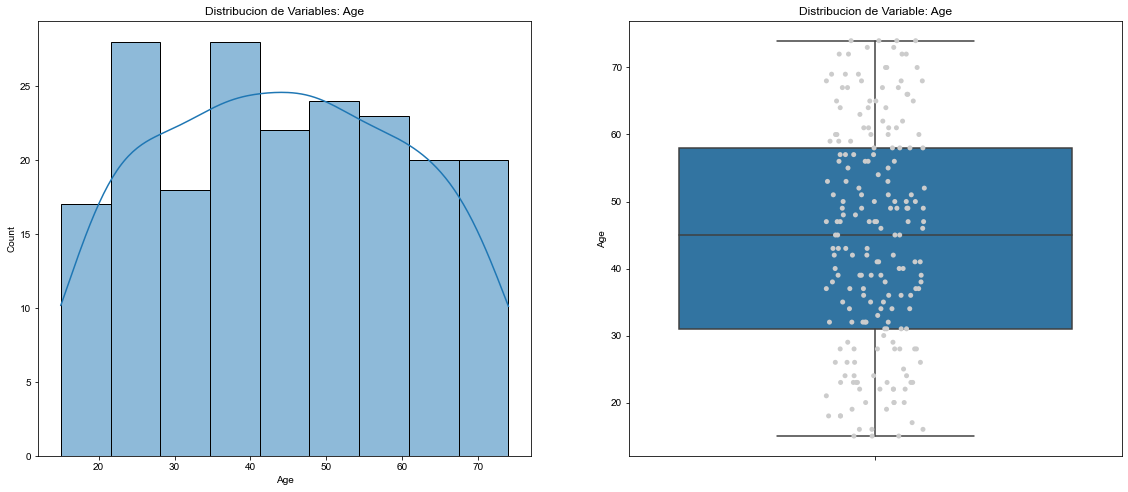

In [11]:
explorarVariableContinua(df,'Age')

In [12]:
df['Age'].describe() # se explora información general de la caracteristica Age

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

In [13]:
df['Age'].mode()

0    47
Name: Age, dtype: int64

a.	Agrupar la variable año en intervalos (ejemplo, menores de 20, o 20-30, etc.)

In [14]:
#previo a esto se procede a realizar una copia del dataset antes de agregar esta columna
df1 = df.copy()

In [15]:
df1.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


**Agrupamiento de Edad de 10 en 10 -rango de edades**

In [16]:
df1['age_range'] = (df1['Age']//10)*10  

In [17]:
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,age_range
0,23,F,HIGH,HIGH,25.355,drugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40
3,28,F,NORMAL,HIGH,7.798,drugX,20
4,61,F,LOW,HIGH,18.043,drugY,60


In [18]:
# Visualizar los datos de las edades según los rangos de edad lo facilita
df1.groupby('age_range').size()

age_range
10    12
20    35
30    37
40    38
50    33
60    32
70    13
dtype: int64

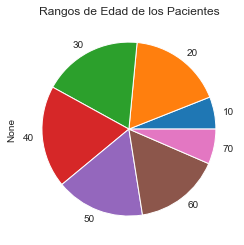

In [19]:
df1.groupby('age_range').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Rangos de Edad de los Pacientes')
plt.show()

**Agrupamiento de Edad menores de 20, o 20-30**

In [20]:
category = pd.cut(df1.Age,bins=[0,20,30,40,50,60,70,80],labels=['Menores a 20','20 -30','30 - 40','40-50','50-60','60-70','mas de 70'])
df1.insert(5,'Age_group',category)

In [21]:
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Age_group,Drug,age_range
0,23,F,HIGH,HIGH,25.355,20 -30,drugY,20
1,47,M,LOW,HIGH,13.093,40-50,drugC,40
2,47,M,LOW,HIGH,10.114,40-50,drugC,40
3,28,F,NORMAL,HIGH,7.798,20 -30,drugX,20
4,61,F,LOW,HIGH,18.043,60-70,drugY,60


**Generar una tabla que utilice la agrupación de Edades**

In [22]:
round(df1.pivot_table(['Na_to_K'],['Age_group'],['BP'],aggfunc= 'mean',fill_value=0),2)

Na_to_K              
BP              HIGH    LOW NORMAL
Age_group                         
Menores a 20   21.61  11.85   9.49
20 -30         19.47  13.91  16.33
30 - 40        16.40  15.81  13.44
40-50          13.98  16.29  13.34
50-60          14.68  22.21  14.34
60-70          18.60  16.67  14.70
mas de 70      13.26  14.12  19.22

**Mostrar como está compuesto la cantidad de pacientes por los rangos**

In [23]:
df1.groupby('Age_group').size()

Age_group
Menores a 20    16
20 -30          32
30 - 40         39
40-50           40
50-60           33
60-70           30
mas de 70       10
dtype: int64

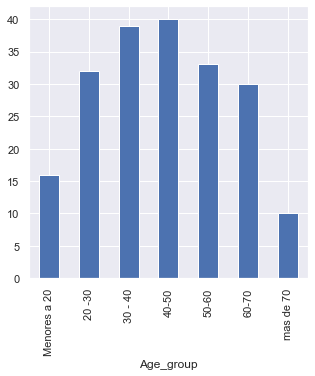

In [24]:
df1.groupby('Age_group').size().plot(kind = 'bar')
sns.set(rc={'figure.figsize':(7,7)})  
plt.show()

### **Característica Sex**

Se procede a generar una exploración de la caracteristica, en la cual se realizan gráficos barras y circulares para visualizar como están compuestos los datos de la caracteristica.

Se observa una buena cantidad de pacientes entre son del género Masculino 104, mientras que el grupo femenino 96. 

Al ser una caracterisitica del tipo de Categorica no se obtinen otro tipo de valoración.

In [25]:
df1.groupby('Sex').size()

Sex
F     96
M    104
dtype: int64

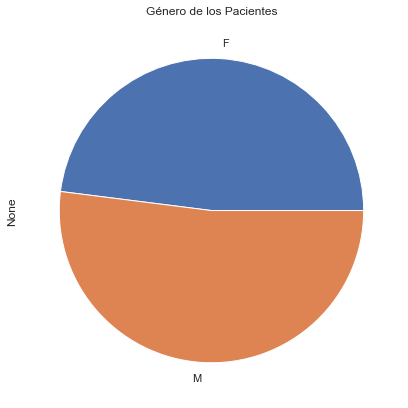

In [26]:
df1.groupby('Sex').size().plot(kind = 'pie') 
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Género de los Pacientes')
plt.show()

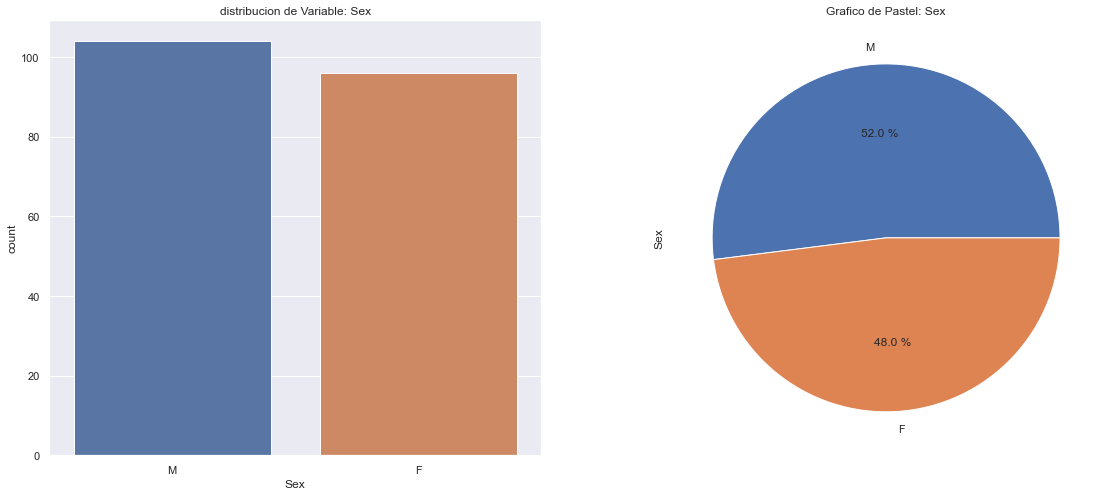

In [27]:
explorarVariableCategorica(df, 'Sex')

### **Característica BP**

Se procede a generar una exploración de la caracteristica, en la cual se realizan gráficos barras y circulares para visualizar como están compuestos los datos de la caracteristica.

Se observa una buena cantidad de pacientes presentan un tipo de presion arterial (BP) del tipo Alto (High) un total de 77. 

Al ser una caracterisitica del tipo de Categorica no se obtinen otro tipo de valoración.

In [28]:
df1.groupby('BP').size()

BP
HIGH      77
LOW       64
NORMAL    59
dtype: int64

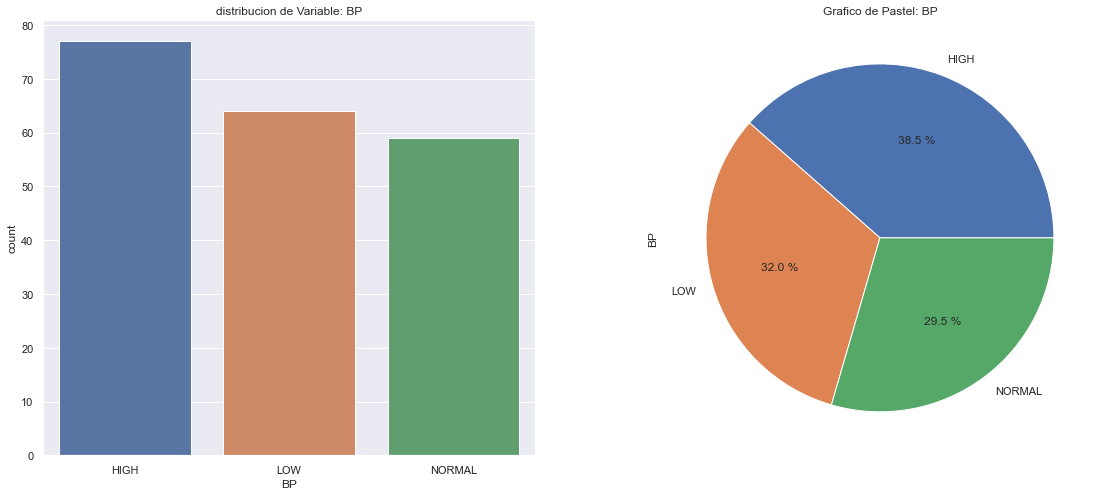

In [29]:
explorarVariableCategorica(df, 'BP')

### **Caracteristica Cholesterol**

Se procede a generar una exploración de la caracteristica, en la cual se realizan gráficos barras y circulares para visualizar como están compuestos los datos de la caracteristica.

Se observa una buena cantidad de pacientes presenta un nivel de colesterol alto (High) un total de 103 y solo 97 un tipo normal

Al ser una caracterisitica del tipo de Categorica no se obtinen otro tipo de valoración.

In [30]:
df1.groupby('Cholesterol').size()

Cholesterol
HIGH      103
NORMAL     97
dtype: int64

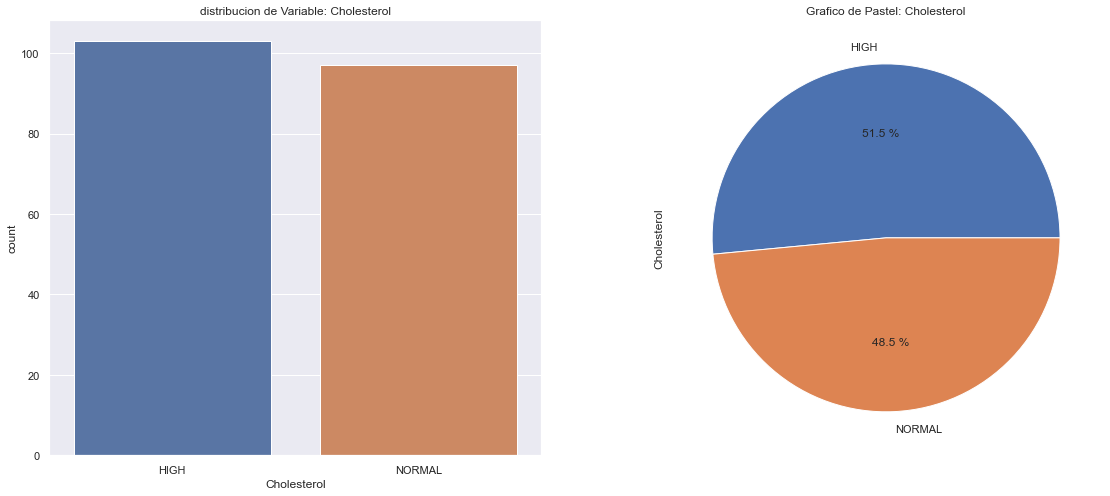

In [31]:
explorarVariableCategorica(df, 'Cholesterol')

### **Caracteristica Na_to_K**

Se procede a generar una exploración de la caracteristica, en la cual se realizan histogramas y boxplots para conocer la distribución de los datos.

Se observa una buena cantidad de pacientes entre un valor de Na_to_K 15 a 20. 

**La edad promedio/media** corresponde a 16, **la mediana** es de 13.93 lo cual indica que el 50% de los pacientes presenta una valor de Na_to_K menor o igual a 13.93. mientras que la **moda** corresponde a dos valores 12 y 18, por lo tanto es bimodal con dos valores que se repiten mucho.

In [32]:
df['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

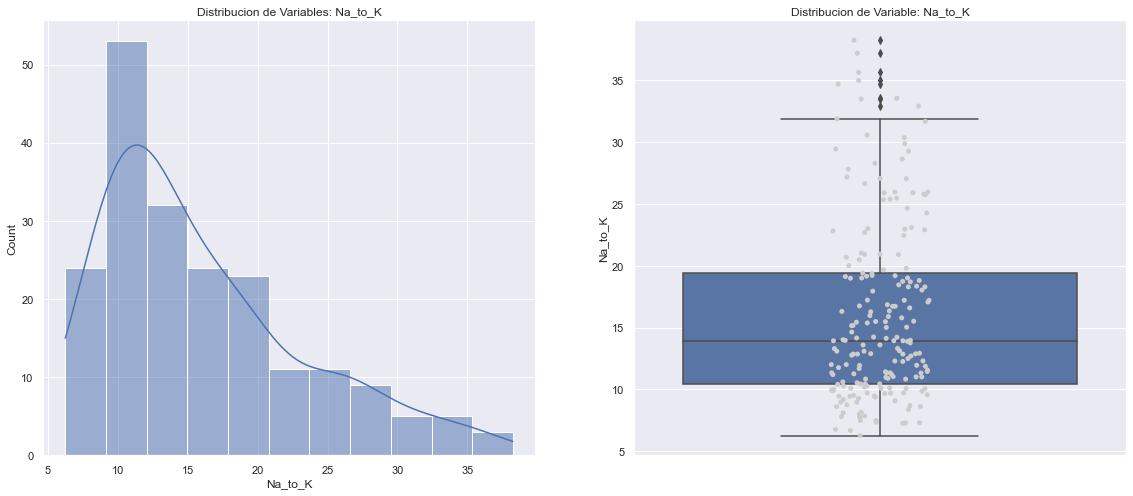

In [33]:
explorarVariableContinua(df,'Na_to_K')

In [34]:
df['Na_to_K'].mode()

0    12.006
1    18.295
Name: Na_to_K, dtype: float64

b.	Agrupar la variable Na_to_k en intervalos (menores a 10, 10-20, etc.)

**Agrupamiento #1 - Por rangos de 5 en 5**

In [35]:
df1['range_Nato_K'] = (df1['Na_to_K']//5)*5  

In [36]:
df1.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Age_group,Drug,age_range,range_Nato_K
0,23,F,HIGH,HIGH,25.355,20 -30,drugY,20,25.0
1,47,M,LOW,HIGH,13.093,40-50,drugC,40,10.0
2,47,M,LOW,HIGH,10.114,40-50,drugC,40,10.0
3,28,F,NORMAL,HIGH,7.798,20 -30,drugX,20,5.0
4,61,F,LOW,HIGH,18.043,60-70,drugY,60,15.0


**Agrupamieto # 2 menores a 10, 10-20 , etc**

In [37]:
category1 = pd.cut(df1.Na_to_K,bins=[0,10,20,30,40],labels=['Menor a 10','10- 20','20-30','30-40'])
df1.insert(5,'Na_to_K_group',category1)

In [38]:
df1.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_group,Age_group,Drug,age_range,range_Nato_K
0,23,F,HIGH,HIGH,25.355,20-30,20 -30,drugY,20,25.0
1,47,M,LOW,HIGH,13.093,10- 20,40-50,drugC,40,10.0
2,47,M,LOW,HIGH,10.114,10- 20,40-50,drugC,40,10.0
3,28,F,NORMAL,HIGH,7.798,Menor a 10,20 -30,drugX,20,5.0
4,61,F,LOW,HIGH,18.043,10- 20,60-70,drugY,60,15.0


*Creación de una Tabla para visualizar los rangos de*  **Na_to_K_group**

In [39]:
round(df1.pivot_table(['Age'],['Na_to_K_group'],['BP'],aggfunc= 'mean',fill_value=0),2)

Age              
BP              HIGH    LOW NORMAL
Na_to_K_group                     
Menor a 10     49.92  40.88  42.89
10- 20         42.71  46.92  44.10
20-30          34.71  51.33  48.78
30-40          40.83  47.40  23.00

### **Caracteristica Drug**

Se procede a generar una exploración de la caracteristica, en la cual se realizan gráficos barras y circulares para visualizar como están compuestos los datos de la caracteristica.

Se observa una buena cantidad de pacientes que utilizan la drugY un total de 91, seguido por drugx con 54. 

Al ser una caracterisitica del tipo de Categorica no se obtinen otro tipo de valoración.

In [40]:
df1.groupby('Drug').size()

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
dtype: int64

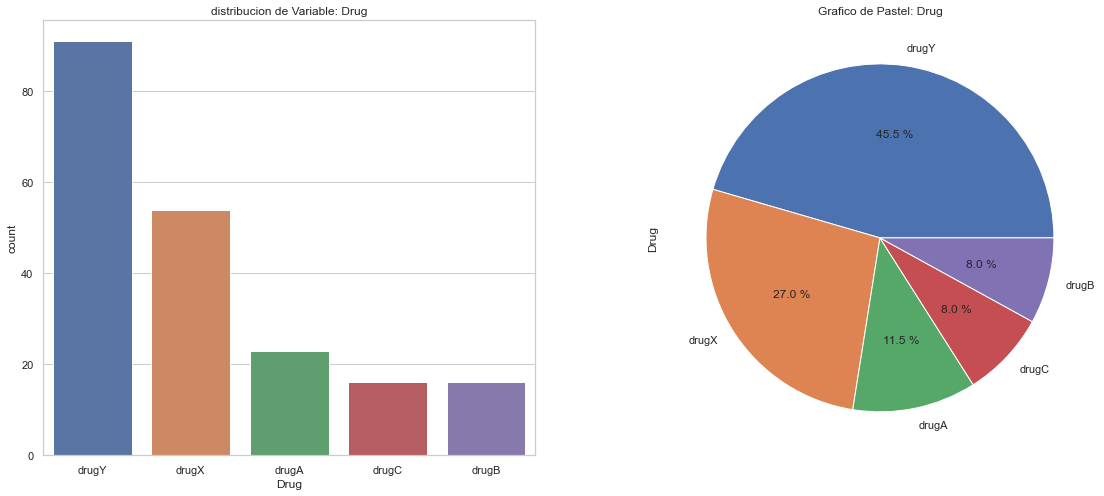

In [41]:
explorarVariableCategorica(df1,'Drug')

### **Tablas Pivote** 

Para realizar una observación de los datos según las caracteristicas y ver que resultados se pueden analizar a raiz de las tablas

**Tabla Pivote** según el rango de edad y la cantidad de **Na_to_K**

In [42]:
round(df1.pivot_table(['Na_to_K'],['age_range'],aggfunc= 'mean',fill_value=0),2)

,Na_to_K
age_range,
10,17.49
20,17.23
30,15.37
40,15.27
50,16.76
60,16.08
70,14.40


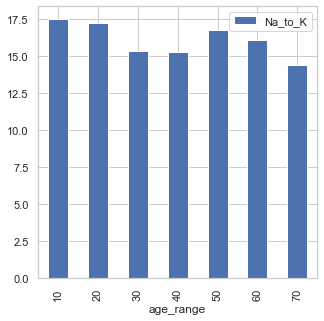

In [43]:
round(df1.pivot_table(['Na_to_K'],['age_range'],aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar');

**Tabla Pivote** según el rango de edad, incluyendo el tipo de Drogra y el ratio de Na_to_K

In [44]:
round(df1.pivot_table(['Na_to_K'],['age_range'],['Drug'],aggfunc= 'mean',fill_value=0),2)

Na_to_K                            
Drug        drugA  drugB  drugC  drugX  drugY
age_range                                    
10          13.31   0.00  12.01   9.56  22.27
20          10.78   0.00  10.68  11.01  23.96
30          11.22   0.00   9.71  10.43  21.46
40          10.77   0.00  11.10  10.07  22.52
50           7.49  12.16  11.01  11.88  22.90
60           0.00  11.40  10.29   9.84  22.49
70           0.00  10.76   6.77  13.29  18.46

In [45]:
round(df1.pivot_table(['Na_to_K'],['Age_group'],['Sex'],aggfunc= 'mean',fill_value=0),2)

Na_to_K       
Sex                F      M
Age_group                  
Menores a 20   17.40  17.30
20 -30         17.18  16.91
30 - 40        15.76  15.35
40-50          16.73  13.83
50-60          17.70  15.61
60-70          17.84  15.76
mas de 70      18.29  11.62

In [46]:
round(df1.pivot_table(['Na_to_K'],['age_range'],['BP'],aggfunc= 'mean',fill_value=0),2)

Na_to_K              
BP           HIGH    LOW NORMAL
age_range                      
10          21.15  12.01   9.56
20          20.04  13.59  16.25
30          15.68  16.16  13.48
40          15.83  16.04  12.21
50          14.77  22.21  14.65
60          18.00  16.67  13.88
70          12.81  14.12  19.86

**Tabla Pivote** Na_to_K_group, Edad promedio por el tipo de BP

In [47]:
round(df1.pivot_table(['Age'],['Na_to_K_group'],['BP'],aggfunc= 'mean',fill_value=0),2)

Age              
BP              HIGH    LOW NORMAL
Na_to_K_group                     
Menor a 10     49.92  40.88  42.89
10- 20         42.71  46.92  44.10
20-30          34.71  51.33  48.78
30-40          40.83  47.40  23.00

In [48]:
promedio_drogas= df1.groupby('Drug').mean()
promedio_drogas.head()

,Age,Na_to_K,age_range,range_Nato_K
Drug,,,,
drugA,35.869565,10.918783,30.869565,8.478261
drugB,62.500000,11.524375,58.750000,8.437500
drugC,42.500000,10.633750,36.875000,8.750000
drugX,44.018519,10.650556,39.444444,7.962963
drugY,43.747253,22.374780,39.120879,20.109890


## 2)	Preparación del Dataset para aplicación de los modelos

**d.	Feature Engineering (convirtiendo las variables categóricas en binarias numéricas)**

In [49]:
# convertir la caracteristica Drug a un tipo categorico numerico
df1.groupby('Drug').size()

Drug
drugA    23
drugB    16
drugC    16
drugX    54
drugY    91
dtype: int64

In [50]:
df2 = df1 # copia del data set 1

**Cambio de la caracteristica Drug**

('drugA',4)
('drugB',3)
('drugC',2)
('drugX',1)
('drugY',0)

In [51]:
df2['Drug'] = df2['Drug'].replace('drugA',4)
df2['Drug'] = df2['Drug'].replace('drugB',3)
df2['Drug'] = df2['Drug'].replace('drugC',2)
df2['Drug'] = df2['Drug'].replace('drugX',1)
df2['Drug'] = df2['Drug'].replace('drugY',0)

In [52]:
df2.groupby('Drug').size()

Drug
0    91
1    54
2    16
3    16
4    23
dtype: int64

**Cambio de la caracteristica Sex**

In [53]:
df2.groupby('Sex').size()

Sex
F     96
M    104
dtype: int64

F  = 0      M = 1

In [54]:
df2['Sex'] = df2['Sex'].replace('F',0)
df2['Sex'] = df2['Sex'].replace('M',1)

In [55]:
df2.groupby('Sex').size()

Sex
0     96
1    104
dtype: int64

**Caracteristica BP**

In [56]:
df2.groupby('BP').size()

BP
HIGH      77
LOW       64
NORMAL    59
dtype: int64

In [57]:
df2['BP'] = df2['BP'].replace('HIGH',0)
df2['BP'] = df2['BP'].replace('LOW',1)
df2['BP'] = df2['BP'].replace('NORMAL',2)

In [58]:
df2.groupby('BP').size()

BP
0    77
1    64
2    59
dtype: int64

**Caracteristica Cholesterol**

In [59]:
df2.groupby('Cholesterol').size()

Cholesterol
HIGH      103
NORMAL     97
dtype: int64

In [60]:
df2['Cholesterol'] = df2['Cholesterol'].replace('HIGH',0)
df2['Cholesterol'] = df2['Cholesterol'].replace('NORMAL',1)

In [61]:
df2.groupby('Cholesterol').size()

Cholesterol
0    103
1     97
dtype: int64

### Resampling de los Datos

**Explicación del muestreo**
Inicialmente se realizó con las 5 categorias de drogras, sin embargo al realizar una prediccion no binaria, el resultado del modelo llegó a ser de un 54%.

Posteriormente al tratar de aplicar 5 caracteristicas en Vectorial, indicó error al no ser una caracteristica booleana.
Por lo tanto se tomaron los dos tipos de drogas/medicamentos suministrados a los pacientes que presentaban mayor cantidad de observaciones quedando el dataframe de 108, mientras que si se reduce el dataframe a 16 por caracteristica queda de un total de 80 observaciones.

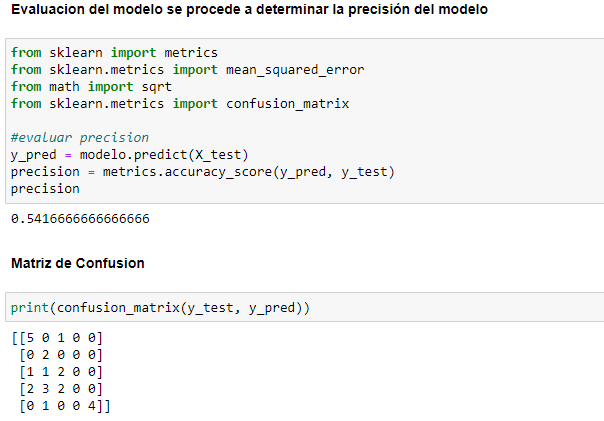 
ejemplo de los resultados obtenidos con las 5 categorias de drug

In [62]:
df2 = df2.sample(frac=1)

drug0 = df2.loc[df2['Drug'] ==0][:54]
drug1 = df2.loc[df2['Drug'] ==1]

#union de los dataframe
normal_distributed_df = pd.concat([drug0,drug1])

#Reordenamineto del dataframe de manera aleatoria
df3 = normal_distributed_df.sample(frac=1, random_state=42)

df3.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Na_to_K_group,Age_group,Drug,age_range,range_Nato_K
103,56,1,2,0,8.966,Menor a 10,50-60,1,50,5.0
125,19,0,0,1,25.969,20-30,Menores a 20,0,10,25.0
123,36,0,2,0,16.753,10- 20,30 - 40,0,30,15.0
162,43,1,2,1,12.859,10- 20,40-50,1,40,10.0
14,50,0,2,0,12.703,10- 20,40-50,1,50,10.0


**Consulta de las Dimensiones del Nuevo Dataframe DF3** el cual se realiza 'resampling' para ajustar a la misma cantidad de observaciones

In [63]:
print("Numero de filas: "+ str(df3.shape[0]))
print("Numero de Columnas: "+ str(df3.shape[1]))

Numero de filas: 108
Numero de Columnas: 10


In [64]:
df3.groupby('Drug').size()

Drug
0    54
1    54
dtype: int64

**Matriz de Correlación**

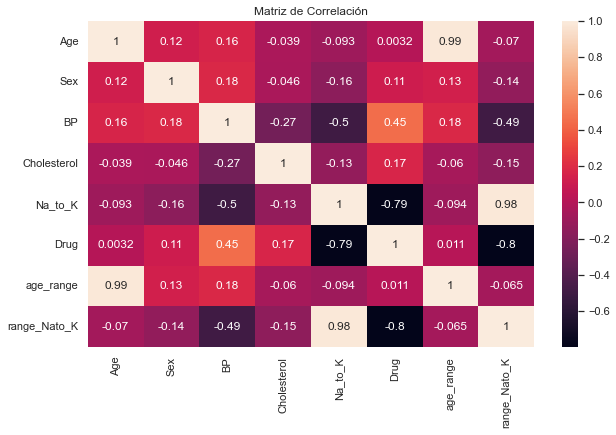

In [65]:
#creacion de la matriz de correlación

correlation_mat = df3.corr()
plt.figure(figsize=(10,6))
plt.title("Matriz de Correlación")
sns.heatmap(correlation_mat, annot=True)
plt.show()

<AxesSubplot:>

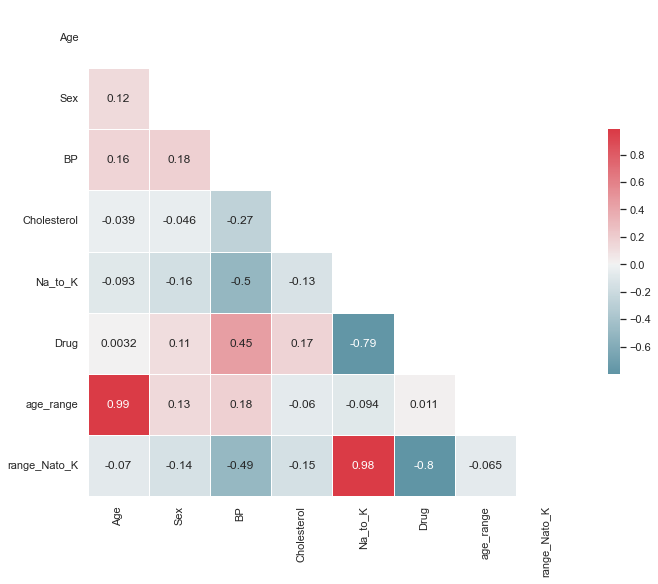

In [66]:
corr= df3.corr()

mask = np.zeros_like(corr, dtype=np.bool);mask[np.triu_indices_from(mask)] = True

f, ax=plt.subplots(figsize=(11,9))

cmap= sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot= True)

**c.	Dividir el conjunto de datos en entrenamiento y prueba**

Y = Drug

X= Age,Na_to_K

In [67]:
df3.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Na_to_K_group',
       'Age_group', 'Drug', 'age_range', 'range_Nato_K'],
      dtype='object')

In [68]:
X=np.array(df3.drop(['Drug','Na_to_K_group','Age_group','age_range','range_Nato_K',],1))
Y=np.array(df3['Drug'].values)

## Modelo #1  K-Nearest-Neighbor - K Vecinos Más Cercanos

70 % training y 30% testing

In [69]:
#from sklearn metrics import classification report
#form sklearn import metrics

from sklearn.model_selection import train_test_split
#creacion de conntos de training y de testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

**Creacion del modelo KNN con K=5**

In [70]:
from sklearn.neighbors import KNeighborsClassifier
modelo= KNeighborsClassifier(n_neighbors=5)

**Entrenamiento del modelo**

In [71]:
modelo.fit(X_train, y_train)

KNeighborsClassifier()

**Evaluacion del modelo se procede a determinar la precisión del modelo**

In [72]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import confusion_matrix

#evaluar precision
y_pred = modelo.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test)
precision

0.9393939393939394

**Matriz de Confusion**

In [73]:
print(confusion_matrix(y_test, y_pred))

[[15  1]
 [ 1 16]]


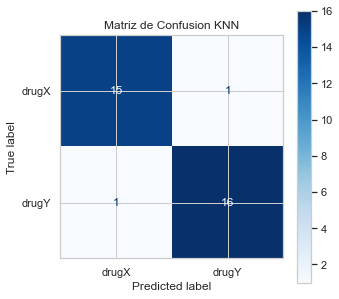

In [74]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(modelo, X_test, y_test,
                            display_labels=['drugX','drugY'],
                            cmap=plt.cm.Blues)
disp.ax_.set_title("Matriz de Confusion KNN");

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.94      0.94      0.94        17

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



**Cuando se probó con todas las caracterisitcas de Drug** la matrix de confusion quedó de la siguiente manera, volviendose un poco incomprensible en el proceso de analizarla.
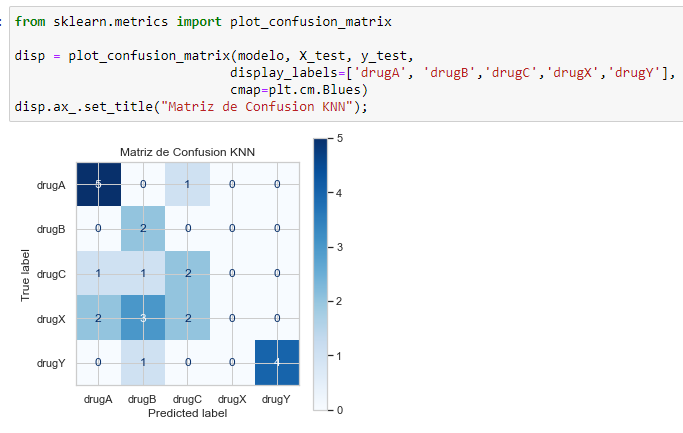

**Elegir el K óptimo**

In [76]:
def encotrarMejorK(pX,pY, porcentajeTesting):
    mejor_k=0
    mejor_evaluacion=0
    X_train,X_test,y_train,y_test = train_test_split(pX,pY,test_size=porcentajeTesting)
    
    #creacion del for
    for i in range(1,30):
        knn= KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred=knn.predict(X_test)
        evaluacion=metrics.accuracy_score(y_pred, y_test)
        
        if(evaluacion>mejor_evaluacion):
            mejor_k=i
            mejor_evaluacion=evaluacion
            
    print("Mejor K encontrado: "+str(mejor_k))
    print("Mejor rendimiento encontrado: "+str(mejor_evaluacion))
    
encotrarMejorK(X,Y,0.30)

Mejor K encontrado: 6
Mejor rendimiento encontrado: 0.9696969696969697


**Creacion del modelo KNN con K=2**

In [77]:
from sklearn.neighbors import KNeighborsClassifier
modelo= KNeighborsClassifier(n_neighbors=2)

In [78]:
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [79]:
#entrenamiento del modelo
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [80]:
#evaluacion del modelo
y_pred = modelo.predict(X_test)
precision = metrics.accuracy_score(y_pred, y_test)
precision

0.9393939393939394

**Matrix de Confusion**

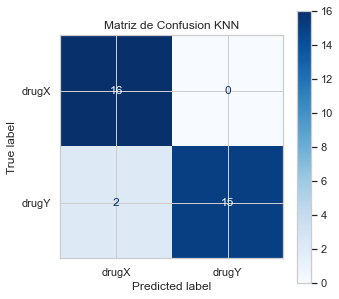

In [81]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(modelo, X_test, y_test,
                            display_labels=['drugX','drugY'],
                            cmap=plt.cm.Blues)
disp.ax_.set_title("Matriz de Confusion KNN");

In [82]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.88      0.94        17

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.95      0.94      0.94        33



### Modelo# 2  Support Vector Machine - Maquinas de Soporte Vectorial 

**Kernel Lineal**

In [83]:
from sklearn.model_selection import train_test_split

#division de los datos en training y testing 70-30

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=109)

**Creación de Modelo**

In [84]:
from sklearn import svm

#Creación delmodelo
clf= svm.SVC(kernel='linear') # lienar kernel

#entrenamiento del modelo
clf.fit(X_train, y_train)

#Prediccion usando el modelo
y_pred = clf.predict(X_test)

**Metricas de Evaluación**

In [85]:
from sklearn import metrics

#consultar la accuracy del modelo
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))

#consultar Precisión del Modelo
print('Precision:',metrics.precision_score(y_test, y_pred))

# consultar Recall del modelo
print('Recall:',metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


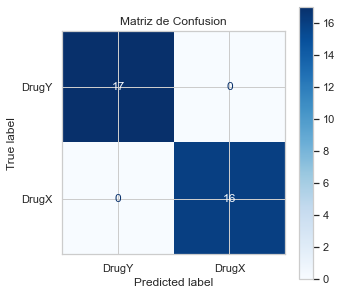

In [86]:
clases=['DrugY','DrugX']
disp = plot_confusion_matrix(clf, X_test, y_test, display_labels = clases, cmap = plt.cm.Blues)
disp.ax_.set_title('Matriz de Confusion')
plt.show()

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



## c.	Arboles Decision

**-Predictoras (X)**: BP - Cholesterol

**-a predecir (Y)**: Drug

In [109]:
df3.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Na_to_K_group',
       'Age_group', 'Drug', 'age_range', 'range_Nato_K'],
      dtype='object')

In [115]:
df3['Drug'] = df3['Drug'].replace(0, 'drugY')
df3['Drug'] = df3['Drug'].replace(1, 'drugX')

In [117]:
df3.groupby('Drug').size()

Drug
drugX    54
drugY    54
dtype: int64

In [118]:
X=np.array(df3[['Sex','Age']].values)
Y=np.array(df3['Drug'].values)

**Division de los datos en training y Testing**

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**Creacion del clasificador**

In [120]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(max_depth =5, random_state=0)

#entrenamiento del modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [121]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 44.00
|   |--- feature_1 <= 40.50
|   |   |--- feature_1 <= 39.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 23.50
|   |   |   |   |   |--- class: drugY
|   |   |   |   |--- feature_1 >  23.50
|   |   |   |   |   |--- class: drugY
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 18.50
|   |   |   |   |   |--- class: drugX
|   |   |   |   |--- feature_1 >  18.50
|   |   |   |   |   |--- class: drugY
|   |   |--- feature_1 >  39.50
|   |   |   |--- class: drugX
|   |--- feature_1 >  40.50
|   |   |--- class: drugY
|--- feature_1 >  44.00
|   |--- feature_1 <= 49.50
|   |   |--- class: drugX
|   |--- feature_1 >  49.50
|   |   |--- feature_1 <= 55.50
|   |   |   |--- feature_1 <= 51.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- class: drugX
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- class: drugY
|   |   |   |--- feature_1 >  51.50
|   |   |   |   |--- class: drugX
|   |   |--- feature

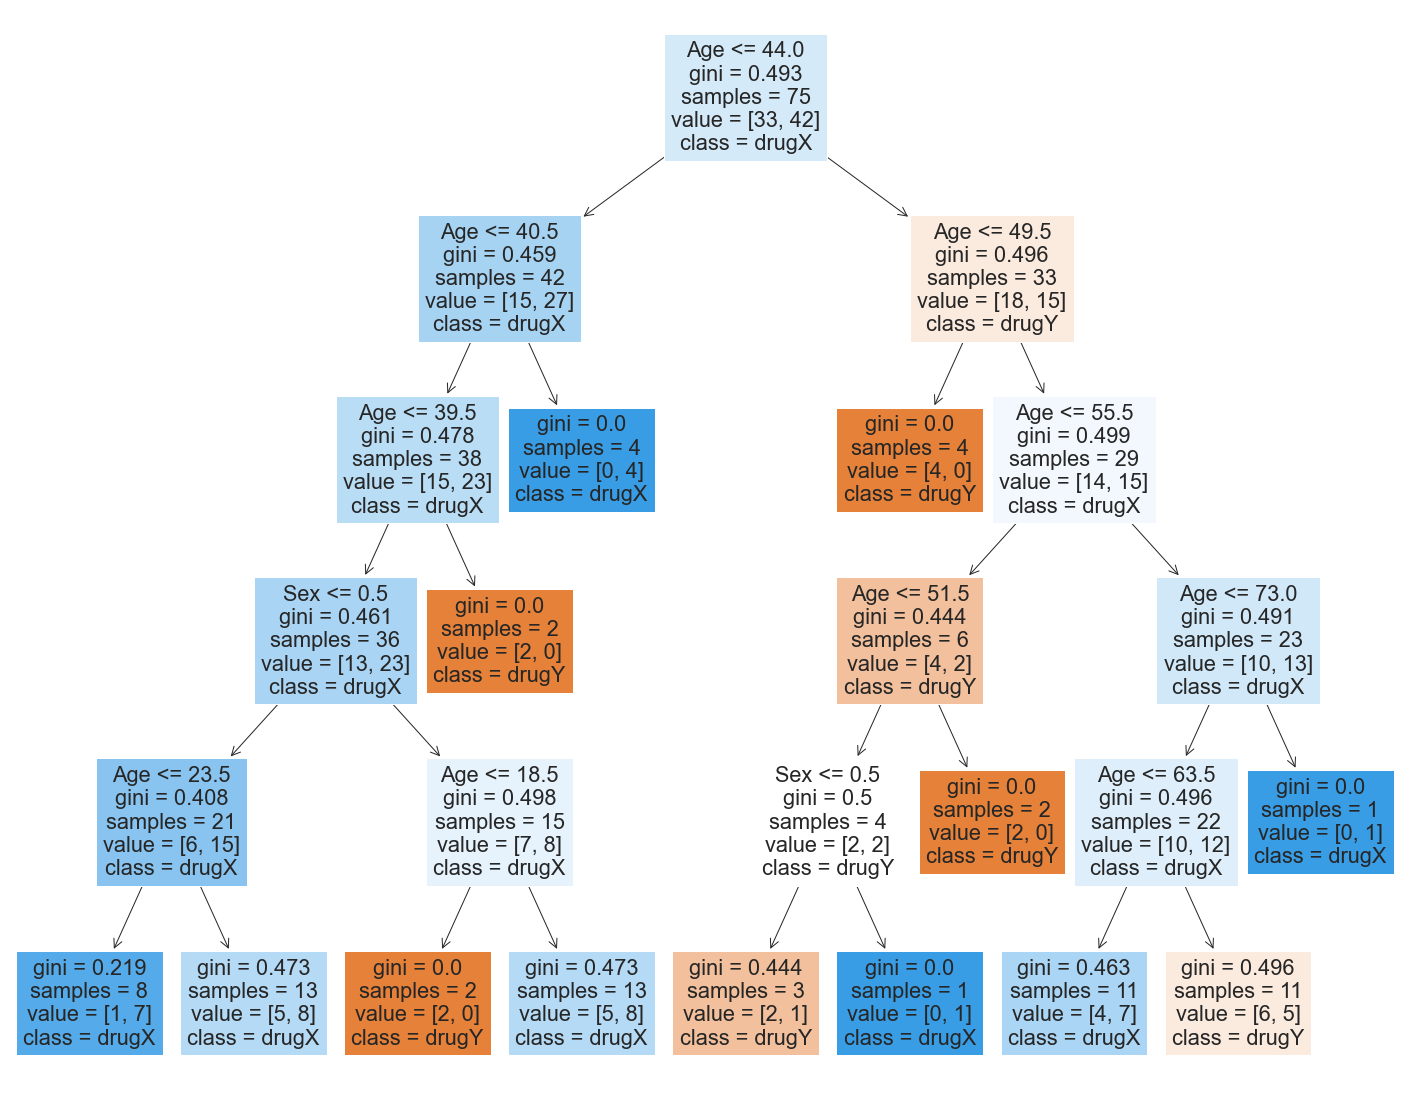

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
feature=['Sex','Age']
target=['drugY','drugX']

arbol= tree.plot_tree(clf, feature_names=feature,class_names=target,filled=True)

**Evaluacion del Modelo**

In [124]:
from sklearn import metrics

#realizar una prediccion 
y_pred = clf.predict(X_test)

print("Precision del Modelo:" , metrics.accuracy_score(y_test, y_pred))

Precision del Modelo: 0.42424242424242425


**Matriz de Confusion**

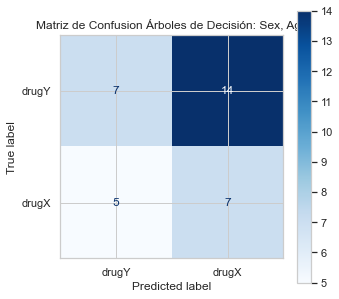

In [125]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

disp = plot_confusion_matrix(clf, X_test, y_test,
                            display_labels=["drugY", "drugX"],
                            cmap=plt.cm.Blues)

disp.ax_.set_title("Matriz de Confusion Árboles de Decisión: Sex, Age")
plt.show();

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugX       0.58      0.33      0.42        21
       drugY       0.33      0.58      0.42        12

    accuracy                           0.42        33
   macro avg       0.46      0.46      0.42        33
weighted avg       0.49      0.42      0.42        33



**Este modelo** nos está brindando un resultado un poco bajo en el que identifica en un 58% la drugX y en un 33% a la DrogaY.

**Determinar Profundidad Optima del Árbol de Decisión**

In [127]:
# definir el rango

max_depth_range =list(range(1,6))
accuracy= []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    score= metrics.accuracy_score(y_test, y_pred)
    accuracy.append(score)
    
#listar los resultados obtenidos
print(accuracy)

[0.3939393939393939, 0.3939393939393939, 0.45454545454545453, 0.45454545454545453, 0.42424242424242425]


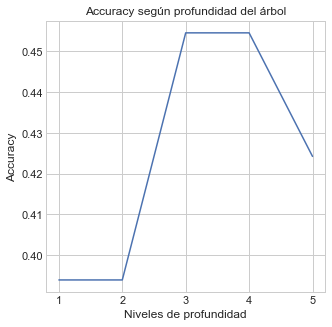

In [128]:
# e procede a generar la gráfica

plt.style.use('seaborn-whitegrid')
plt.plot(max_depth_range, accuracy);
plt.xlabel("Niveles de profundidad")
plt.ylabel("Accuracy")
plt.title("Accuracy según profundidad del árbol")
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**Creacion del clasificador**

In [130]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier(max_depth =3, random_state=0)

#entrenamiento del modelo
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

**Evaluacion del Modelo - profundidad 3**

In [131]:
from sklearn import metrics

#realizar una prediccion 
y_pred = clf.predict(X_test)

print("Precision del Modelo:" , metrics.accuracy_score(y_test, y_pred))

Precision del Modelo: 0.45454545454545453


**Matriz de Confusion**

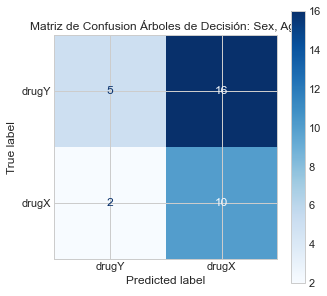

In [132]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

disp = plot_confusion_matrix(clf, X_test, y_test,
                            display_labels=["drugY", "drugX"],
                            cmap=plt.cm.Blues)

disp.ax_.set_title("Matriz de Confusion Árboles de Decisión: Sex, Age")
plt.show();

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       drugX       0.71      0.24      0.36        21
       drugY       0.38      0.83      0.53        12

    accuracy                           0.45        33
   macro avg       0.55      0.54      0.44        33
weighted avg       0.59      0.45      0.42        33



**Finalmente este modelo nos indica** que está identificando a la drugX en un 71%, mientras que a la DrugY l identifica en un 38%

### Modelo #4	Regresión Logistica

Determinar por las caracteristicas del paciente el tipo de droga a suministrar

Drugx = 1

DrugY = 0

In [143]:
df3.groupby('Drug').size()

Drug
drugX    54
drugY    54
dtype: int64

In [144]:
df3['Drug'] = df3['Drug'].replace('drugX',1)
df3['Drug'] = df3['Drug'].replace('drugY',0)

In [145]:
df3.groupby('Drug').size()

Drug
0    54
1    54
dtype: int64

In [146]:
# importar las librerias que se requieren

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Aplicacion del Modelo de Regresion**

In [147]:
df3.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Na_to_K_group',
       'Age_group', 'Drug', 'age_range', 'range_Nato_K'],
      dtype='object')

In [148]:
#seleccionr el las variables para el modelo
#variable predictoria 
X=np.array(df3[['Sex','BP']].values)
y=np.array(df3['Drug'].values)

#creamos el conjunto de datos de entrenamiento y testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
#80% en entrenamiento y 20% de testeo

#Nota , solucinadores disponibles : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, defalut ='lbfgs'
model= linear_model.LogisticRegression(C=0.01, solver='sag')
clf=model.fit(X_train, y_train)

#Predecimos las etiquetas del conjunto de datos prueba
LR1_pred_labels = clf.predict(X_test)

# se imprime la intercepcion y la pendiente

print('Intercepcion (Beta 0): ', clf.intercept_)
print('Pendiente (Beta 1): ', clf.coef_)

Intercepcion (Beta 0):  [-0.40581498]
Pendiente (Beta 1):  [[0.00955726 0.12856187]]


In [149]:
#obtener la precision del modelo
score= clf.score(X_test, y_test)
print('Accuracy score: ',score)

Accuracy score:  0.2727272727272727


**Regresion Multinomial**

In [ ]:
X=np.array(df3.drop(['Drug','Na_to_K_group','Age_group','age_range','range_Nato_K',],1))
Y=np.array(df3['Drug'].values)

In [150]:
#variable predictoria 
X=np.array(df3.drop(['Drug','Na_to_K_group','Age_group','age_range','range_Nato_K',],1))

#variable a predecir 
y=np.array(df3['Drug'])

In [151]:
from sklearn.model_selection import train_test_split

#creacion de conunto de training y testing 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
#80% en entrenamiento y 20% de testeo

In [152]:
#Nota , solucinadores disponibles : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, defalut ='lbfgs'
modelo= linear_model.LogisticRegression(multi_class ='multinomial')

#entrenamiento del modelo
modelo.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

**Evaluacion del Modelo**

In [153]:
predicciones= modelo.predict(X_test)

print(predicciones)

[1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1]


In [154]:
accuracy_score(y_test, predicciones)

1.0

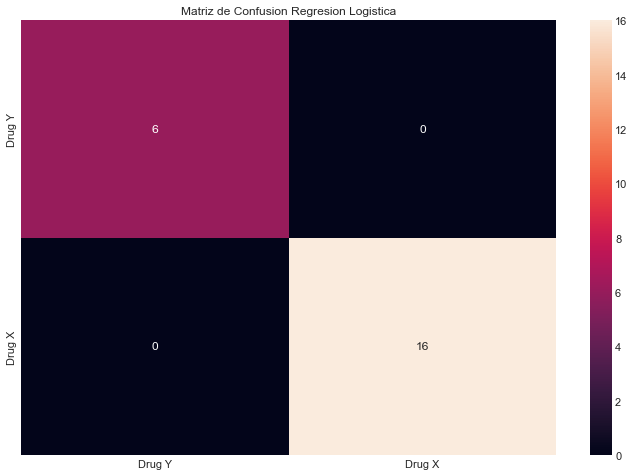

In [155]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predicciones), index=['Drug Y', 'Drug X'],
                    columns=['Drug Y','Drug X'])

plt.figure(figsize=(12,8))
plt.title('Matriz de Confusion Regresion Logistica')
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [156]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        16

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



**El resultado de la regresion logistica** indica un valor de 100% en identificacion de Droga Y, mientras que un 100 en la identificacion de DrogaX

### 5)	Elige el mas preciso e interpreta el significado de la predicción

Al proceder a realizar los diferentes modelos de Machine Learn se obtienen diferentes resultados, entre los más satisfactorios correspode al de **K-Nearest-Neighbor** con un resultado de 93 %.


Sin embargo otro de los modelos lanzaron un valor de 100, esto se debería a un factor de ajuste o revision de algunos valores, por lo que el valor del 93% en mi parecer, resulta más ajustado a la realidad.

Es importante que los valores sean revisados a luz que la muestra se le realizó un tratamiento en vista al desbalance de los resultados.

Por lo que acompañar un modelo como **K-Nearest-Neighbor** con alguno de los otro tales como **Regresion logistica -Regresion Multinomial** o con el de **Maquinas de Soporte Vectorial** resulta como una buena opción.